# 인공신경망 활용하기



## 실습 목표
-----
- torchvision 데이터 셋을 사용하여 이미지 분류기를 생성한다.
- 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용한다.




## 문제 정의
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## 주요 개념 리뷰
----

### 1. TensorDataset과 DataLoader

- 입력 데이터를 쉽게 처리하고, 배치 단위로 잘러서 학습할 수 있게 도와주는 모듈
- **Dataset** : 학습시 사용하는 feature와 target의 pair로 이루어짐 

- **DataLoader**: 학습 시 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)를 생성

- **DataLoader가 하는 역할**
    - shuffling
    - batch ...

### 2. Device 설정
- 일반적으로 인공신경망의 학습은 (가능하다면) GPU를 사용하는 것이 바람직함
- GPU를 사용하여 학습을 진행하도록 명시적으로 작성 필요
- 연산 유형에 따라 GPU에서 수행이 불가능한 경우도 존재하는데, 그럴 경우도 마찬가지로 명시적으로 어떤 프로세서에서 연산을 수행해야하는지 코드로 작성해야함


### 3. 신경망 생성

- **torch.nn 패키지**는 신경망 생성 및 학습 시 설정해야하는 다양한 기능을 제공
- 신경망을 **nn.Module**을 상속받아 정의
    - __ __init__ __(): 신경망에서 사용할 layer를 초기화하는 부분
    - __forward()__: feed foward 연산 수행 시, 각 layer의 입출력이 어떻게 연결되는지를 지정


### 4. Model compile

- 학습 시 필요한 정보들(loss function, optimizer)을 선언
- 일반적으로 loss와 optimizer는 아래와 같이 변수로 선언하고, 변수를 train/test 시 참고할 수 있도록 매개변수로 지정해줌 


### 5. Train
- **신경망의 학습과정**을 별도의 함수로 구성하는 것이 일반적
    - feed forward -> loss -> error back propagation -> (log) -> (반복)

### 6. Test

- 학습과정과 비슷하나 error back propagate하는 부분이 없음
    - feed forward -> loss ->  (log) -> (반복)

### 7. Iteration
- 신경망 학습은 여러 epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터를 찾음
- 지정한 epochs 수만큼 **학습**과정과 **평가**과정을 반복하면서, 모델의 성능(loss, accuracy 등)을 체크함

## 주요 코드
----

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

### [Step1] Load libraries & Datasets

* **[torch.nn](https://pytorch.org/docs/stable/nn.html)** :  신경망을 생성하기 위한 기본 재료들을 제공(Modules, Sequential, Layer, Activations, Loss, Dropout...)
* **[torchvision.datasets](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)** : torchvision.transforms를 사용해 변형이 가능한 형태, feature와 label을 반환
* **[torchvision.transforms](https://tutorials.pytorch.kr/beginner/basics/transforms_tutorial.html)**
    * ToTensor() : ndarray를 FloatTensor로 변환하고 이미지 픽셀 크기를 [0., 1.]범위로 조정(scale)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# FashionMNIST 데이터 불러오기
training_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)
# 수행하고자 하는 행렬을 변환시키고자한다면 transform인자에 특정값을 넣어주면된다. 이후에 하는걸루~!

### [Step2] Create DataLoader

In [ ]:
train_dataloader= DataLoader(training_data,batch_size=64, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
# device 설정
device='cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

device = cpu


#### EDA

In [ ]:
print(training_data, '\n--------------------------\n', test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
--------------------------
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
train_features, train_labels= next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}') 
print(f'Labels batch shape: {train_labels.size()}')
# 이미지의 size는 28*28 이며 채널은 1이며 64개의 feature가 있다.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


label=9


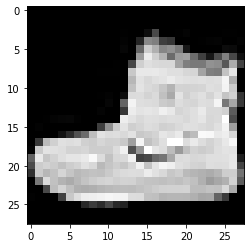

In [ ]:
img, label=training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label={label}')

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Dress
Dress
Shirt
Trouser
Shirt
Sandal
Sneaker
Shirt
Dress
T-Shirt


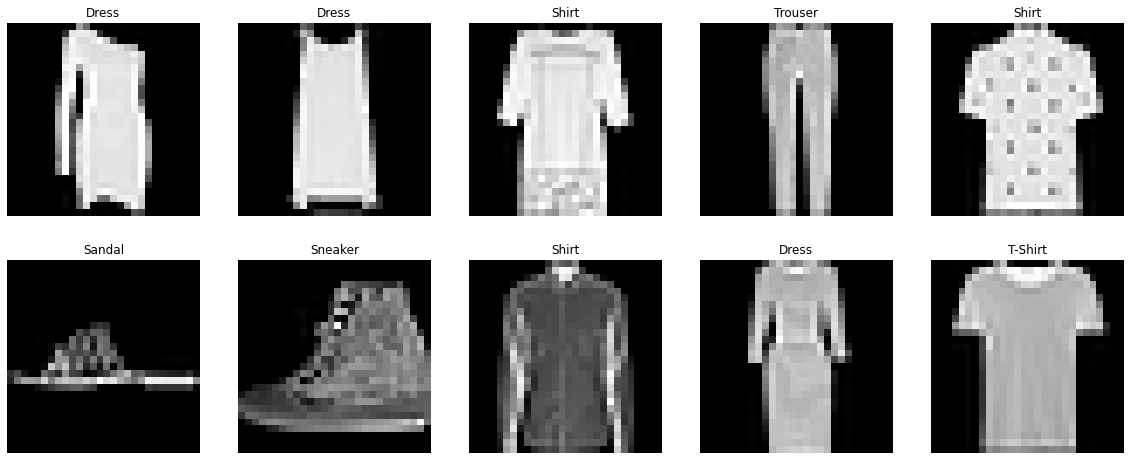

In [ ]:
figure=plt.figure(figsize=(20,8))
cols, rows= 5,2

for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  print(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

In [ ]:
T=torch.randint(60,size=(1,),dtype=float)
print(T)
print(T.item())

tensor([24.], dtype=torch.float64)
24.0


### [Step3] Set Network Structure

In [ ]:
class NNnet(nn.Module):
  def __init__(self):
    super(NNnet,self).__init__()
    self.flatten=nn.Flatten() # 2차원 형태를 1차원의 구조로 펴줌
    self.classifier = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10),
    ) #Sequential은 순서대로 반복되는 것을 결정해줌
  def forward(self,x):
     x=self.flatten(x)
     output = self.classifier(x)
     return output

### [Step4] Create Model instance

In [ ]:
model=NNnet().to(device)
print(model)

NNnet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


#### Model 테스트

In [ ]:
# complex model를 만들 경우 제대로 출력되는지 알 수 없기 떄문에 간단한 model test를 진행해본다.
X=torch.rand(1,28,28,device=device)
output=model(X)
print(f'모델 출력 결과: {output}\n')
pred_probab=nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')
y_pred=pred_probab.argmax()
print(y_pred)

모델 출력 결과: tensor([[ 0.1008, -0.0539,  0.0072, -0.0189, -0.2792, -0.1619,  0.3945, -0.1924,
          0.0477, -0.1394]], grad_fn=<AddmmBackward0>)

Softmax 결과: tensor([[0.1120, 0.0959, 0.1020, 0.0994, 0.0766, 0.0861, 0.1502, 0.0835, 0.1062,
         0.0881]], grad_fn=<SoftmaxBackward0>)

tensor(6)


### [Step5] Model compile

In [ ]:
# Loss
loss=nn.CrossEntropyLoss()
# Optimizer
learning_rate = 1e-3 # 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### [Step6] Set train loop

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
  size= len(train_loader.dataset)

  for batch, (X,y) in enumerate(train_loader):
    X,y = X.to(device), y.to(device)
    pred=model(X)

    # 손실 계산
    loss=loss_fn(pred,y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%100==0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss {loss:>7f} [{current:>5d}]/{size:5d}')


### [Step7] Set test loop

In [ ]:
def test_loop(test_loader, model, loss_fn):
  size= len(test_loader.dataset)
  num_batches=len(test_loader)
  test_loss,correct=0,0
  
  with torch.no_grad():
    for X,y in test_loader:
      X,y = X.to(device), y.to(device)
      pred=model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  test_loss /=num_batches
  correct /= size
  print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n')

### [Step8] Run model

In [ ]:
epochs=10

for i in range(epochs):
  print(f'Epoch {i+1} \n---------------------')
  train_loop(train_dataloader, model, loss, optimizer)
  test_loop(test_dataloader, model ,loss)
print('Done!')

Epoch 1 
---------------------
loss 2.337759 [    0]/60000
loss 0.845089 [ 6400]/60000
loss 0.922676 [12800]/60000
loss 0.832121 [19200]/60000
loss 0.562271 [25600]/60000
loss 0.402809 [32000]/60000
loss 0.683111 [38400]/60000
loss 0.181130 [44800]/60000
loss 0.760297 [51200]/60000
loss 0.356566 [57600]/60000
Test Error: 
 Accuracy: 83.5%, Avg loss: 0.466608

Epoch 2 
---------------------
loss 0.401778 [    0]/60000
loss 0.485809 [ 6400]/60000
loss 0.430515 [12800]/60000
loss 0.341268 [19200]/60000
loss 0.364107 [25600]/60000
loss 0.409333 [32000]/60000
loss 0.283253 [38400]/60000
loss 0.637496 [44800]/60000
loss 0.610587 [51200]/60000
loss 0.367432 [57600]/60000
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.442664

Epoch 3 
---------------------
loss 0.419647 [    0]/60000
loss 0.330104 [ 6400]/60000
loss 0.332822 [12800]/60000
loss 0.433105 [19200]/60000
loss 0.386362 [25600]/60000
loss 0.259031 [32000]/60000
loss 0.520074 [38400]/60000
loss 0.519337 [44800]/60000
loss 0.342337 [51200]

### [Step9] Save & load model

#### parameter만 저장하고 불러오기

In [ ]:
torch.save(model.state_dict(),'model_weight.pth')

In [ ]:
model2=NNnet().to(device)
print(model2)

NNnet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
model2.load_state_dict(torch.load('model_weight.pth'))

<All keys matched successfully>

In [ ]:
model2.eval()
test_loop(test_dataloader, model2, loss)

Test Error: 
 Accuracy: 87.7%, Avg loss: 0.345470



#### Model 전체를 저장하고 불러오기

In [ ]:
torch.save(model,'model.pth')

In [ ]:
model3=torch.load('model.pth')

In [ ]:
model3.eval()
test_loop(test_dataloader,model3,loss)

Test Error: 
 Accuracy: 87.7%, Avg loss: 0.345470

